In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import scipy
import math

%matplotlib inline

import pandas as pd
import io
dtrain = pd.read_csv("drive/MyDrive/dataset/train_timeseries.csv")
d1 = dtrain.iloc[0:1000, 3:20]
d1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,100.51,9.65,14.74,13.51,13.51,20.96,11.46,9.50,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81
1,100.55,10.42,16.69,14.71,14.71,22.80,12.61,10.18,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41
2,100.15,11.76,18.49,16.52,16.52,22.73,15.32,7.41,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66
3,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58
4,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,13.48,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99.86,16.43,23.44,21.77,21.77,26.52,20.77,5.75,23.40,1.63,2.31,0.99,1.33,3.51,5.00,1.64,3.36
996,100.04,14.43,23.26,19.68,19.68,28.86,18.10,10.76,23.38,2.08,2.56,1.17,1.39,4.08,5.70,1.72,3.97
997,100.22,15.04,22.55,20.42,20.42,26.20,20.23,5.96,22.55,2.82,3.55,2.07,1.48,5.27,6.94,3.87,3.06
998,99.81,14.04,20.25,19.26,19.26,21.88,19.19,2.69,20.25,4.00,4.80,3.12,1.68,6.89,8.29,5.94,2.35


In [ ]:
t = np.zeros((1000,17))
t[:] = d1[:]

split = 600
df = t[:split,:]
dt = t[split:,:]

In [ ]:
train = np.zeros((400,17))
train[:] = dt[:]
print(train)

[[100.37  13.26  26.72 ...   3.36   0.36   3.  ]
 [100.24  14.84  27.49 ...   3.23   0.29   2.95]
 [100.17  14.64  27.77 ...   3.75   0.65   3.1 ]
 ...
 [100.22  15.04  22.55 ...   6.94   3.87   3.06]
 [ 99.81  14.04  20.25 ...   8.29   5.94   2.35]
 [ 98.5   17.34  24.15 ...  11.99   8.52   3.47]]


In [ ]:
test = np.zeros((600,17))
test[:] = df[:]
print(test)

[[100.51   9.65  14.74 ...   6.04   3.23   2.81]
 [100.55  10.42  16.69 ...   6.13   3.72   2.41]
 [100.15  11.76  18.49 ...   9.52   5.87   3.66]
 ...
 [100.17  14.09  24.62 ...   6.     2.82   3.18]
 [100.36  11.23  23.59 ...   5.66   1.41   4.25]
 [100.43  10.7   24.95 ...   5.38   1.37   4.01]]


In [ ]:
print("test"+ str(df.shape))

test(600, 17)


In [ ]:
Y_test = np.zeros((600,1))

Y_test[:] = test[:,[16]]
print(Y_test)

[[ 2.81]
 [ 2.41]
 [ 3.66]
 [ 5.58]
 [ 4.19]
 [ 5.17]
 [ 4.03]
 [ 3.72]
 [ 2.49]
 [ 5.88]
 [ 4.67]
 [ 5.17]
 [ 2.63]
 [ 3.12]
 [ 4.97]
 [ 2.91]
 [ 4.5 ]
 [ 2.55]
 [ 5.56]
 [ 4.07]
 [ 1.81]
 [ 2.96]
 [ 4.35]
 [ 2.38]
 [ 4.07]
 [ 2.87]
 [ 3.41]
 [ 2.93]
 [ 5.12]
 [ 3.58]
 [ 2.14]
 [ 5.11]
 [ 2.19]
 [ 6.75]
 [ 5.18]
 [ 2.6 ]
 [ 3.52]
 [ 4.72]
 [ 4.63]
 [ 5.2 ]
 [ 5.33]
 [ 3.09]
 [ 4.86]
 [ 4.66]
 [ 3.32]
 [ 5.07]
 [ 4.34]
 [ 3.09]
 [ 2.88]
 [ 2.25]
 [ 2.62]
 [ 4.02]
 [ 4.46]
 [ 2.38]
 [ 3.32]
 [ 3.3 ]
 [ 3.95]
 [ 3.34]
 [ 2.96]
 [ 5.54]
 [ 1.87]
 [ 2.95]
 [ 5.54]
 [ 2.41]
 [ 3.18]
 [ 4.08]
 [ 5.07]
 [ 4.73]
 [ 3.53]
 [ 3.17]
 [ 3.6 ]
 [ 2.02]
 [ 4.5 ]
 [ 5.3 ]
 [ 2.83]
 [ 2.71]
 [ 2.4 ]
 [ 2.63]
 [ 5.3 ]
 [ 2.08]
 [ 4.  ]
 [ 5.29]
 [ 4.23]
 [ 2.79]
 [ 3.23]
 [ 4.19]
 [ 4.91]
 [ 5.16]
 [ 3.45]
 [ 4.78]
 [ 2.9 ]
 [ 2.61]
 [ 3.15]
 [ 7.61]
 [ 5.37]
 [ 6.03]
 [ 4.46]
 [ 3.93]
 [ 6.11]
 [ 3.02]
 [ 5.78]
 [ 2.14]
 [ 4.38]
 [ 3.48]
 [ 2.42]
 [ 3.51]
 [ 3.94]
 [ 3.84]
 [ 2.26]
 [ 6.5 ]
 [ 4.77]
 

In [ ]:
Y_train = np.zeros((400,1))

Y_train[:] = train[:,[16]]
print(Y_train)

[[3.  ]
 [2.95]
 [3.1 ]
 [3.08]
 [4.02]
 [1.99]
 [1.55]
 [2.99]
 [2.97]
 [2.9 ]
 [2.14]
 [2.  ]
 [2.48]
 [2.87]
 [3.4 ]
 [2.13]
 [1.91]
 [2.36]
 [3.31]
 [3.22]
 [2.43]
 [3.23]
 [4.83]
 [3.  ]
 [4.42]
 [4.71]
 [4.96]
 [2.74]
 [2.94]
 [3.75]
 [4.07]
 [4.48]
 [3.7 ]
 [2.79]
 [3.54]
 [5.09]
 [4.55]
 [3.03]
 [4.74]
 [3.54]
 [4.68]
 [4.02]
 [4.53]
 [3.13]
 [1.61]
 [3.34]
 [4.62]
 [1.29]
 [2.67]
 [3.12]
 [2.76]
 [5.97]
 [6.45]
 [4.38]
 [2.27]
 [2.77]
 [4.73]
 [4.51]
 [4.29]
 [4.91]
 [4.57]
 [4.15]
 [3.03]
 [3.31]
 [2.98]
 [1.83]
 [4.02]
 [4.39]
 [4.37]
 [4.7 ]
 [2.8 ]
 [3.37]
 [4.5 ]
 [4.56]
 [4.88]
 [4.77]
 [2.94]
 [4.92]
 [3.75]
 [4.55]
 [4.68]
 [3.41]
 [3.33]
 [2.99]
 [5.21]
 [5.44]
 [4.79]
 [4.6 ]
 [4.05]
 [1.98]
 [4.8 ]
 [4.49]
 [2.22]
 [2.68]
 [3.67]
 [4.64]
 [2.53]
 [2.51]
 [7.61]
 [1.94]
 [3.9 ]
 [3.56]
 [3.84]
 [4.04]
 [3.55]
 [3.9 ]
 [3.83]
 [3.3 ]
 [3.15]
 [2.87]
 [3.18]
 [1.27]
 [7.73]
 [7.71]
 [4.04]
 [2.17]
 [3.61]
 [2.77]
 [5.07]
 [2.49]
 [4.73]
 [4.55]
 [3.97]
 [1.83]
 [4.09]


In [ ]:
X_test = np.zeros((500,16))
X_train = np.zeros((500,16))

X_test = np.delete(test,16,axis=1)
X_train = np.delete(train,16,axis=1)

In [ ]:
print(X_test)
print("test:"+ str(X_test.shape))
print(X_train)
print("Train:"+ str(X_train.shape))

[[100.51   9.65  14.74 ...   4.85   6.04   3.23]
 [100.55  10.42  16.69 ...   5.33   6.13   3.72]
 [100.15  11.76  18.49 ...   7.53   9.52   5.87]
 ...
 [100.17  14.09  24.62 ...   3.96   6.     2.82]
 [100.36  11.23  23.59 ...   4.54   5.66   1.41]
 [100.43  10.7   24.95 ...   3.35   5.38   1.37]]
test:(600, 16)
[[100.37  13.26  26.72 ...   1.95   3.36   0.36]
 [100.24  14.84  27.49 ...   2.     3.23   0.29]
 [100.17  14.64  27.77 ...   2.5    3.75   0.65]
 ...
 [100.22  15.04  22.55 ...   5.27   6.94   3.87]
 [ 99.81  14.04  20.25 ...   6.89   8.29   5.94]
 [ 98.5   17.34  24.15 ...  10.69  11.99   8.52]]
Train:(400, 16)


In [ ]:
X_train_final = np.zeros((16,400))
X_test_final = np.zeros((16,600))
Y_train_final = np.zeros((1,400))
Y_test_final = np.zeros((1,600))

X_train_final = np.transpose(X_train)
X_test_final = np.transpose(X_test)
Y_train_final = np.transpose(Y_train)
Y_test_final = np.transpose(Y_test)

In [ ]:
print(X_train_final[:][:])

[[100.37 100.24 100.17 ... 100.22  99.81  98.5 ]
 [ 13.26  14.84  14.64 ...  15.04  14.04  17.34]
 [ 26.72  27.49  27.77 ...  22.55  20.25  24.15]
 ...
 [  1.95   2.     2.5  ...   5.27   6.89  10.69]
 [  3.36   3.23   3.75 ...   6.94   8.29  11.99]
 [  0.36   0.29   0.65 ...   3.87   5.94   8.52]]


In [ ]:
mtr = X_train_final.shape[1]
print(mtr)
utr = np.sum(X_train_final,axis=1,keepdims=True)/mtr
print(utr)

400
[[100.3563  ]
 [ 10.4314  ]
 [ 18.49845 ]
 [ 12.921875]
 [ 12.932225]
 [ 25.2651  ]
 [ 12.5084  ]
 [ 12.756825]
 [ 18.420725]
 [  2.0604  ]
 [  2.89915 ]
 [  1.23655 ]
 [  1.66245 ]
 [  4.073825]
 [  5.7894  ]
 [  2.2869  ]]


In [ ]:
train_set_x = X_train_final - utr
test_set_x = X_test_final - utr

In [ ]:
norm = (np.sum(np.square(train_set_x),axis=1,keepdims=True))/mtr

train_set_x = train_set_x / norm
test_set_x = test_set_x / norm

In [ ]:
print(train_set_x)
print("train:"+ str(train_set_x.shape))
print(test_set_x)
print("Test:"+ str(test_set_x.shape))

[[  0.07546388  -0.64061672  -1.02619858 ...  -0.75078297  -3.009191
  -10.22508011]
 [  0.13589863   0.21180892   0.20220002 ...   0.22141781   0.17337333
    0.33192013]
 [  0.11859499   0.12970216   0.13374113 ...   0.05844318   0.02526592
    0.08152301]
 ...
 [ -1.26575725  -1.23595825  -0.93796824 ...   0.71289639   1.67838401
    3.94310806]
 [ -1.15900343  -1.22102304  -0.97294459 ...   0.54892128   1.19297109
    2.95814467]
 [ -1.05780842  -1.09623625  -0.8986074  ...   0.86907287   2.00543876
    3.42177885]]
train:(16, 400)
[[ 8.46627599e-01  1.06696009e+00 -1.13636483e+00 ... -1.02619858e+00
   2.03807555e-02  4.05962616e-01]
 [-3.75419605e-02 -5.47707128e-04  6.38319026e-02 ...  1.75775552e-01
   3.83683256e-02  1.29047486e-02]
 [-5.42152459e-02 -2.60867010e-02 -1.21890361e-04 ...  8.83027149e-02
   7.34450732e-02  9.30629302e-02]
 ...
 [ 4.62584786e-01  7.48655192e-01  2.05981122e+00 ... -6.78374249e-02
   2.77830982e-01 -4.31385233e-01]
 [ 1.19554729e-01  1.62491384e-01

In [ ]:
def sigmoid(z):
   
    s = 1 / (1 + np.exp(-z))
    
    return s

In [ ]:
def sigmoiderivative(Z):
  
  f = Z * (1-Z)
  
  return f

In [ ]:
def tanh(z):
    
    s = (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))
    
    return s

In [ ]:
def tanhderivative(x):
    
    p = 1 - np.square(x)
    
    return p

In [ ]:
def relu(z):
    
    s = np.maximum(0,z)
    
    return s

In [ ]:
def reluderivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

In [ ]:
def initialize(layer):
    
    l = len(layer)
    parameters = {}
    np.random.seed(0)
    for i in range(1,l-1):
      parameters["W"+str(i)]=np.random.randn(layer[i],layer[i-1]) * np.sqrt(2/layer[i-1]) 
      parameters["b"+str(i)]=np.zeros((layer[i],1))
    
    parameters["W"+str(l-1)]=np.random.randn(layer[l-1],layer[l-2]) * 0.001
    parameters["b"+str(l-1)]=np.zeros((layer[l-1],1)) 
   
    
    return parameters

In [ ]:
def initialize_adam(parameters,layer) :
    
    L = len(parameters) // 2
    v = {}
    s = {}
    
   
    for l in range(L-1):
   
        v["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)
        s["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
        s["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)
    
    
    return v, s

In [ ]:
def random_mini_batches(X, Y, mini_batch_size = 512):
    
               
    m = X.shape[1]                  
    mini_batches = []
        
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size : (k+1)*mini_batch_size]
      
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        
        mini_batch_X = shuffled_X[:, num_complete_minibatches*mini_batch_size:]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches*mini_batch_size:]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [ ]:
def fwd_propagation(X,parameters,layer):
  
  l = len(layer)
  forward = {}
  
  forward["Z"+str(1)]=np.dot(parameters["W"+str(1)],X)+parameters["b"+str(1)]
    
  forward["A"+str(1)]=relu(forward["Z"+str(1)])
  
  for i in range(2,l-1):
    forward["Z"+str(i)]=np.dot(parameters["W"+str(i)],forward["A"+str(i-1)])+parameters["b"+str(i)]
    forward["A"+str(i)]=relu(forward["Z"+str(i)])
   
  forward["Z"+str(l-1)]=np.dot(parameters["W"+str(l-1)],forward["A"+str(l-2)])+parameters["b"+str(l-1)]
  forward["A"+str(l-1)]=sigmoid(forward["Z"+str(l-1)])
  
  return forward

In [ ]:
def fwd_propagation_drop(X,parameters,layer,keep_prob):
  drop = {}
  l = len(layer)
  forward = {}
  
  forward["Z"+str(1)]=np.dot(parameters["W"+str(1)],X)+parameters["b"+str(1)]
    
  forward["A"+str(1)]=relu(forward["Z"+str(1)])
  drop["d"+str(1)]=(np.random.rand(forward["A"+str(1)].shape[0],forward["A"+str(1)].shape[1])) < keep_prob[1]
    
  forward["A"+str(1)] = np.multiply(forward["A"+str(1)],drop["d"+str(1)])
  forward["A"+str(1)] = forward["A"+str(1)] / keep_prob[1]
  
  for i in range(2,l-1):
    forward["Z"+str(i)]=np.dot(parameters["W"+str(i)],forward["A"+str(i-1)])+parameters["b"+str(i)]
    
    forward["A"+str(i)]=relu(forward["Z"+str(i)])
    drop["d"+str(i)]=(np.random.rand(forward["A"+str(i)].shape[0],forward["A"+str(i)].shape[1])) < keep_prob[i]
    
    forward["A"+str(i)] = np.multiply(forward["A"+str(i)],drop["d"+str(i)])
    forward["A"+str(i)] = forward["A"+str(i)] / keep_prob[i]
    
  forward["Z"+str(l-1)]=np.dot(parameters["W"+str(l-1)],forward["A"+str(l-2)])+parameters["b"+str(l-1)]
  forward["A"+str(l-1)]=sigmoid(forward["Z"+str(l-1)])
  
  return forward

In [ ]:
def back_prop(X,Y,forward,layer,parameters,lambd=0.6):
  m = X.shape[1]
  l = len(layer)
  grads = {}
  
  grads["dz"+str(l-1)]= forward["A"+str(l-1)] - Y
  grads["dw"+str(l-1)]=(np.dot(grads["dz"+str(l-1)],forward["A"+str(l-2)].T) / m) + ((lambd/m)*parameters["W"+str(l-1)])
  grads["db"+str(l-1)]=np.sum(grads["dz"+str(l-1)],axis=1,keepdims=True) / m 
  grads["da"+str(l-2)]=np.dot(parameters["W"+str(l-1)].T,grads["dz"+str(l-1)])
  
  for i in range(l-2,1,-1):
    grads["dz"+str(i)]=grads["da"+str(i)]*reluderivative(forward["A"+str(i)])
    grads["dw"+str(i)]=(np.dot(grads["dz"+str(i)],forward["A"+str(i-1)].T) / m) + ((lambd/m)*parameters["W"+str(i)])
    grads["db"+str(i)]=np.sum(grads["dz"+str(i)],axis=1,keepdims=True)/m
    grads["da"+str(i-1)]=np.dot(parameters["W"+str(i)].T,grads["dz"+str(i)])
  
  grads["dz"+str(1)]=grads["da"+str(1)]*reluderivative(forward["A"+str(1)])
  grads["dw"+str(1)]=np.dot(grads["dz"+str(1)],X.T)/m + ((lambd/m)*parameters["W"+str(1)])

  grads["db"+str(1)]=np.sum(grads["dz"+str(1)],axis=1,keepdims=True)/m
    
  return grads

In [ ]:
def optimise(parameters,grads,layer,learning_rate=0.01):
  l= len(layer)
  
  for i in range(1,l):
    parameters["W"+str(i)]=parameters["W"+str(i)] - (learning_rate * grads["dw"+str(i)])
    parameters["b"+str(i)]=parameters["b"+str(i)] - (learning_rate * grads["db"+str(i)])
  
  return parameters

In [ ]:
def update_parameters_with_adam(parameters, grads, layer, v, s, t, learning_rate = 0.01, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    
    for l in range(L-1):
       
        v["dW" + str(l+1)] = beta1 * v['dW' + str(l+1)] + (1-beta1) * grads['dw' + str(l+1)]
        v["db" + str(l+1)] = beta1 * v['db' + str(l+1)] + (1-beta1) * grads['db' + str(l+1)]
       
        v_corrected["dw" + str(l+1)] = v['dW' + str(l+1)] / (1 - np.power(beta1, t))
        v_corrected["db" + str(l+1)] = v['db' + str(l+1)] / (1 - np.power(beta1, t))
       

        s["dW" + str(l+1)] = beta2 * s['dW' + str(l+1)] + (1-beta2) * np.power(grads['dw' + str(l+1)], 2)
        s["db" + str(l+1)] = beta2 * s['db' + str(l+1)] + (1-beta2) * np.power(grads['db' + str(l+1)], 2)
        
        s_corrected["dw" + str(l+1)] = s['dW' + str(l+1)] / (1 - np.power(beta2, t))
        s_corrected["db" + str(l+1)] = s['db' + str(l+1)] / (1 - np.power(beta2, t))
       
        parameters["W" + str(l+1)] = parameters['W' + str(l+1)] - learning_rate * v_corrected['dw' + str(l+1)] / np.sqrt(s_corrected['dw' + str(l+1)] + epsilon)
        parameters["b" + str(l+1)] = parameters['b' + str(l+1)] - learning_rate * v_corrected['db' + str(l+1)] / np.sqrt(s_corrected['db' + str(l+1)] + epsilon)
       
    return parameters, v, s

In [ ]:
def predict(X,parameters,layers):
  l= len(layer)
  fwd = fwd_propagation(X,parameters,layers)
  
  Y1 = fwd["A"+str(l-1)]
  Y1 = np.around(Y1)
  
  return Y1

In [ ]:
def calculate_cost(Y,forward,parameters,layer,lambd=0.6):
  l= len(layer)
  m=Y.shape[1]
  
  cost = (-1 * np.sum((Y * np.log(forward["A"+str(l-1)])) + (1 - Y) * np.log(1 - forward["A"+str(l-1)])) / m) + ((lambd/(2*m))*np.sum(np.square(parameters["W"+str(l-1)])))
  
  return cost

In [ ]:
def model(X_train,Y_train, X_test, Y_test, layer, keep_prob,mini_batch_size=512, beta1=0.0, beta2=0.0, learning_rate=0.001, iterations = 1500, lambd=0.6):
  costs = []
  
  parameters = initialize(layer)
  v, s = initialize_adam(parameters,layer)
  t = 0
  
  for j in range(iterations):
  
    minibatches = random_mini_batches(X_train,Y_train,mini_batch_size)
    
    for minibatch in minibatches:
      (minibatch_x,minibatch_y) = minibatch
      
      forward = fwd_propagation_drop(minibatch_x,parameters,layer,keep_prob)
      
      cost = calculate_cost(minibatch_y,forward,parameters,layer,lambd)
      grads = back_prop(minibatch_x,minibatch_y,forward,layer,parameters,lambd)
      t=t+1
      parameters,v,s = update_parameters_with_adam(parameters, grads, layer, v, s, t, learning_rate,beta1, beta2)
    
    
    if j % 10 == 0:
      costs.append(cost)
    
    if j%50 == 0:
      print ("Cost after iteration %i: %f" %(j , cost))
    #if j == 100:
      #par = parameters[:]
      
  Y_prediction_train = predict(X_train,parameters,layer)
  Y_prediction_test = predict(X_test,parameters,layer)

  abb = np.mean(np.abs(Y_prediction_train - Y_train)) * 100
  abc = np.mean(np.abs(Y_prediction_test - Y_test)) * 100
  print("train accuracy: {} %".format(100 - abb))
  print("test accuracy: {} %".format(100 - abc))
  
  return parameters, grads, forward, costs, Y_prediction_test, Y_prediction_train

In [ ]:
layer = [16,15,12,6,1]
keep_prob = [1.0,1.0,1.0,1.0,1.0]
para,grd,ford,cst,test,train1 = model(train_set_x, Y_train_final, test_set_x, Y_test_final, layer, keep_prob, mini_batch_size=128, beta1=0.9, beta2=0.999, learning_rate = 0.001, iterations = 620, lambd = 0.0 )

Cost after iteration 0: 0.668572
Cost after iteration 50: 0.478004
Cost after iteration 100: -1.571517
Cost after iteration 150: -8.262150
Cost after iteration 200: -14.707183
Cost after iteration 250: -19.740222


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


Cost after iteration 300: -inf
Cost after iteration 350: -inf
Cost after iteration 400: -inf
Cost after iteration 450: -inf
Cost after iteration 500: -inf
Cost after iteration 550: -inf
Cost after iteration 600: -inf
train accuracy: -150.23999999999998 %
test accuracy: -161.615 %


In [ ]:
print(cst)

[0.668572286686873, 0.6791620025383374, 0.6604869878217319, 0.5997340990120305, 0.6050512501022347, 0.47800367477767053, 0.13000905910284763, 0.07413497697353323, -0.3982077971357291, -0.4286320147583653, -1.5715169738640453, -1.9862679596220298, -1.3663322267643263, -2.295967666452279, -4.814630796767686, -8.262149821969736, -6.346024600496502, -14.841150583052553, -10.487463490941234, -17.394936159933295, -14.707183437840298, -16.102782948499225, -14.383629983280251, -23.629031196182346, -28.825646897607598, -19.74022190027292, -28.078520847569777, -inf, -inf, -42.753500689157896, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf]


In [ ]:
#for test set
exam = np.zeros((1,600))
exam1 = np.zeros((1,600))
exam2 = np.zeros((1,600))
exam3 = np.zeros((1,600))
exam = test - Y_test_final
exam1 = np.copy(exam)
exam2 = np.copy(exam)
exam1[exam1==-1]=0
exam[exam==1]=0

fp = np.sum(exam1)
fn = np.sum(exam)
fn = -1 * fn

exam2[exam2==-1]=1

corr = 600-np.sum(exam2)

exam3 = test * Y_test_final

tp = np.sum(exam3)
tn = corr-tp
print("fp="+ str(fp))
print("fn="+ str(fn))
print("correct="+ str(corr))
print("tp="+ str(tp))
print("tn="+ str(tn))

fp=-1567.69
fn=1569.69
correct=2165.69
tp=2169.69
tn=-4.0


In [ ]:
n = tn+tp+fn+fp
s = (tp+fn)/n
p = (tp+fp)/n

mcc = ((tp/n) - (s*p))/np.sqrt(p*s*(1-s)*(1-p))
mcc1 = ((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print("MCC score="+ str(mcc1))

MCC score=nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


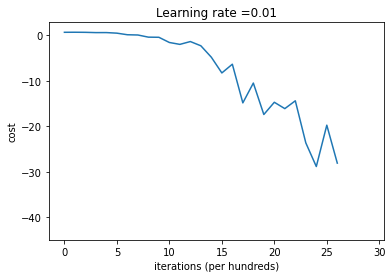

In [ ]:
costs = np.squeeze(cst)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(0.01))
plt.show()

In [79]:
dtest = pd.read_csv("drive/MyDrive/dataset/test_timeseries.csv")
d8 = dtest.iloc[0:425, 3:20]
d8

,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,100.51,9.69,14.71,13.55,13.52,17.38,10.92,6.46,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78
1,100.48,8.65,13.05,11.83,11.74,17.76,9.54,8.23,13.06,1.02,1.35,0.32,1.03,2.13,3.37,0.56,2.81
2,100.03,8.59,12.12,11.67,11.67,13.74,10.44,3.30,12.12,1.83,4.23,0.34,3.88,3.41,7.49,0.72,6.77
3,99.47,7.93,11.80,10.38,9.59,18.19,5.44,12.75,11.72,3.75,5.25,2.34,2.91,6.78,9.61,4.90,4.71
4,100.39,5.32,7.91,4.73,4.71,14.37,3.68,10.69,7.75,2.32,2.90,1.69,1.21,4.42,5.87,3.15,2.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,99.59,8.32,12.89,11.12,11.03,15.90,7.97,7.94,12.45,1.73,2.50,1.00,1.50,3.40,5.49,2.06,3.42
421,100.17,5.71,7.97,5.69,5.54,12.38,2.28,10.10,7.95,3.18,5.22,1.72,3.50,5.80,8.41,3.60,4.81
422,100.94,3.42,3.40,-1.34,-1.38,10.00,-1.06,11.06,3.45,2.49,3.53,1.61,1.92,4.71,5.78,3.67,2.11
423,100.77,4.37,5.40,2.01,1.83,14.21,-2.62,16.83,5.38,2.66,4.63,1.65,2.98,5.38,7.64,2.13,5.51


In [80]:
t8 = np.zeros((425,17))
t8[:] = d8[:]

In [86]:
test_final = np.zeros((17,425))
test_final = np.transpose(t8)

test_final = test_final-utr
test_final = test_final/norm

print(test_final)
print(str(test_final.shape))

ValueError: ignored

In [72]:
y8 = predict(test_final,para,layer)

ValueError: ignored

In [ ]:
print(y8)